Desafío 1: Preparación del ambiente de trabajo

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures as polynom
from sklearn.linear_model import LinearRegression as linreg
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

plt.style.use('seaborn-whitegrid')

from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [55]:
df = pd.read_csv('default_credit.csv')

In [56]:
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [57]:
df = df.drop(columns='index')

In [58]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Desafío 2: Análisis exploratorio

In [60]:
#Explore las principales relaciones entre las variables. Utilizando los métodos
#boxplot y lmplot de seaborn implemente los siguientes gráficos
a='balance'
b='income'
data=df
hue1='student'
hue2='default'

<AxesSubplot:xlabel='balance', ylabel='student'>

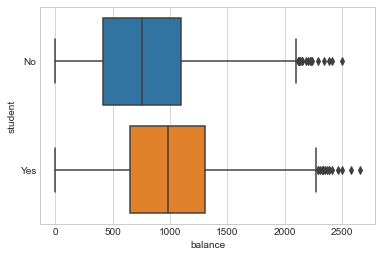

In [61]:
 #Un boxplot del balance total de las cuentas, segmentado por el status de
#estudiante.
sns.boxplot(data=data, x=a, y=hue1 )


<AxesSubplot:xlabel='income', ylabel='student'>

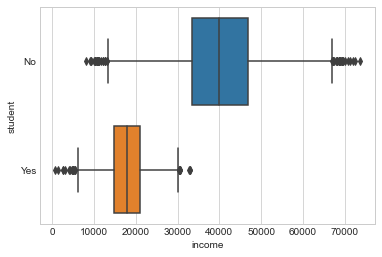

In [63]:
#Un boxplot del ingreso total de cada cliente, segmentado por el status de
#estudiante.
sns.boxplot(data=data, x=b, y=hue1 )

<AxesSubplot:xlabel='balance', ylabel='default'>

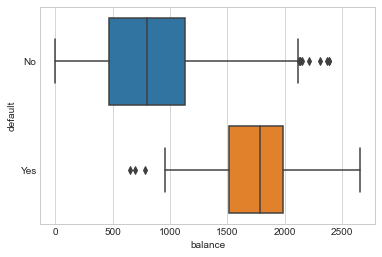

In [64]:
# Un boxplot del balance total de las cuentas, segmentado por el status de
#default.
sns.boxplot(data=data, x=a, y=hue2 )

<AxesSubplot:xlabel='income', ylabel='default'>

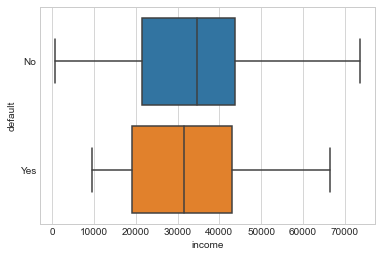

In [65]:
# Un boxplot del ingreso total de cada cliente, segmentado por el status de
#default.
sns.boxplot(data=data, x=b, y=hue2 )

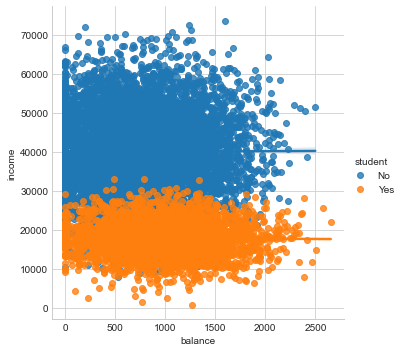

In [66]:
#Un diagrama de dispersión entre balance e income, segmentado por el status
#de estudiante.

sns.lmplot(x=a,y=b,hue=hue1, data=data)


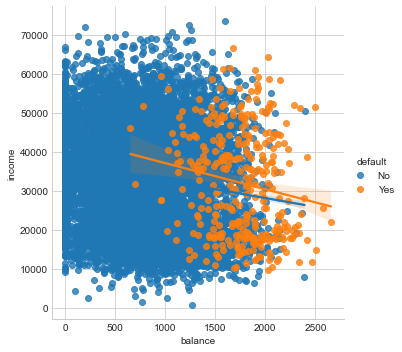

In [67]:
# Un diagrama de dispersión entre balance e income, segmentado por el status
#de default.
sns.lmplot(x=a, y=b,hue=hue2, data=data)

Desafío 3: Modelación econométrica

In [20]:
#Recodifique las variables student y default para que adquieran atributos numéricos.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [69]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [70]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [71]:
df2=df.copy()

In [72]:
df2['student'] = np.where(df2['student'] == 'Yes', 1, 0)

In [73]:
df2['default'] = np.where(df2['default'] == 'Yes', 1, 0)

In [74]:
df2

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


In [75]:
# Implemente el siguiente modelo econométrico:

In [76]:
columnas = list(df.columns)
columnas.remove('default')
sum_var = "+".join(columnas)
sum_var

'student+balance+income'

In [77]:
m1_logit = smf.logit('default ~ '+sum_var, df2).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [78]:
#A partir de este modelo, depúrelo y mantenga las principales características. Ejecute
#de nuevo el modelo y comente brevemente sobre el comportamiento de los
#atributos.

In [79]:
m1_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1579.5448  
Date:               2022-10-29 19:01 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
student      -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
==================================================================

"""

In [80]:
# p valor 0.05
var_d='student + balance'
m2_logit = smf.logit('default ~ '+var_d, df2).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [34]:
m2_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1577.6816  
Date:               2022-10-29 18:52 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -10.7495    0.3692  -29.1149  0.0000  -11.4731  -10.0259
student     -0.7149    0.1475   -4.8459  0.0000   -1.0040   -0.4257
balance      0.0057    0.0002   24.7485  0.0000    0.0053    0.0062
==================================================================

"""

Desafío 4: Entrenar. A partir del modelo depurado, genere un modelo predictivo con las siguientes características:


In [81]:
#Genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.

In [82]:
df2

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


In [83]:
y=df2['default']

In [84]:
X=df2.drop(columns=['default','income'])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1111)

In [86]:
# Estandarice las matrices de atributos de entrenamiento y pruebas usando
#StandardScaler() ajustado solo sobre el conjunto de entrenamiento.

In [87]:
# estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)

# estandarizamos la matriz de pruebas ( se usa para generar la prediccion de las clases)
X_test_std = StandardScaler().fit_transform(X_test)



In [88]:
#Implemente el modelo sin alterar los hiper parámetros.

In [89]:
default_model = LogisticRegression(random_state=1111).fit(X_train_std, y_train)


In [90]:
default_model

LogisticRegression(random_state=1111)

In [91]:
default_model.coef_

array([[-0.4406015 ,  2.76345784]])

In [93]:
# Genere la predicción de las clases y de la probabilidad.

In [94]:
#predicción de las clases
yhat = default_model.predict(X_test_std)


In [95]:
#predicción de probabilidad.
yhat_prob = default_model.predict_proba(X_test_std)

In [96]:
#exactitud de nuestro modelo
m1_acc = accuracy_score(y_test, yhat)
round(m1_acc,2)


0.97

In [98]:
#Reporte las métricas de precisión, recall y f1 para ambas clases.

In [99]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3180
           1       0.73      0.27      0.39       120

    accuracy                           0.97      3300
   macro avg       0.85      0.63      0.69      3300
weighted avg       0.96      0.97      0.96      3300



In [100]:
# Grafique la curva Receiver Operator Characteristic

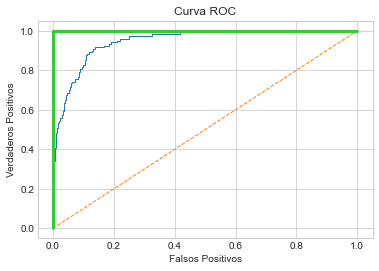

In [101]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat = default_model.predict_proba(X_test_std)[:, 1]

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [102]:
#área bajo la curva
round(roc_auc_score(y_test, yhat),2)

0.95

In [103]:
#En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC.
